In [147]:
import torch
import numpy as np
import os
from pathlib import Path

# Add root folder to the system path
import sys
root_path = '../'
sys.path.append(root_path)

# NOTE: For LaTeX rendering, tex needs to be available
from src.utils import visualisation_parameters

# Graph related
from torch_geometric.utils import to_networkx
import networkx as nx

In [148]:
def plot_pygraph(data):
    """
    Plots the graph Data object
    """
    # Convert PyG graph to NetworkX graph
    G = to_networkx(data, node_attrs=['x'])

    # Extract positions for plotting
    pos = {i: (data.x[i, 0].item(), data.x[i, 1].item()) for i in range(data.x.shape[0])}

    # Plot the graph
    plt.figure(figsize=(8, 8))
    nx.draw(G, pos, with_labels=False, node_size=5, node_color='skyblue', edge_color='gray')
    plt.title(f"Airfoil as Ring Graph, Nodes={data.y[:,0].shape[0]}")
    plt.gca().set_aspect('equal')
    plt.savefig('../images/example_airfoil_graph.png', dpi=300, bbox_inches='tight')
    plt.show()

def rotate_airfoil_coordinates(airfoil_coordinates, angle_of_attack):
    """
    Rotates the airfoil by provided angle of attack 
    """
    angle_of_attack = angle_of_attack * (np.pi/180)
    rotated_airfoil_coordinates = np.zeros((airfoil_coordinates.shape[0], airfoil_coordinates.shape[1]))
    rotated_airfoil_coordinates[:,0] = airfoil_coordinates[:,0] * np.cos(angle_of_attack) + airfoil_coordinates[:,1] * np.sin(angle_of_attack)
    rotated_airfoil_coordinates[:,1] = - airfoil_coordinates[:,0] * np.sin(angle_of_attack) + airfoil_coordinates[:,1] * np.cos(angle_of_attack)
    return rotated_airfoil_coordinates

In [22]:
# List all the files in root/data
dataset_list = [file for file in os.listdir('../data/') if file.endswith('.pt')]

# Pick a dataset and print the dictionary
train_set_GBF_path = '../data/airfrans_train_data_GBF.pt'
train_set_PBF_path = '../data/airfrans_train_data_PBF.pt'
dataset_GBF = torch.load(train_set_GBF_path)
dataset_PBF = torch.load(train_set_PBF_path)

/var/folders/gv/0wtlt8px0t36v_dx5c5q4r4xzc3l_g/T/ipykernel_2146/1349664439.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dataset_GBF = torch.load(train_set_GBF_path)
/

Data(x=[150, 3], edge_index=[2, 300], y=[150, 1])


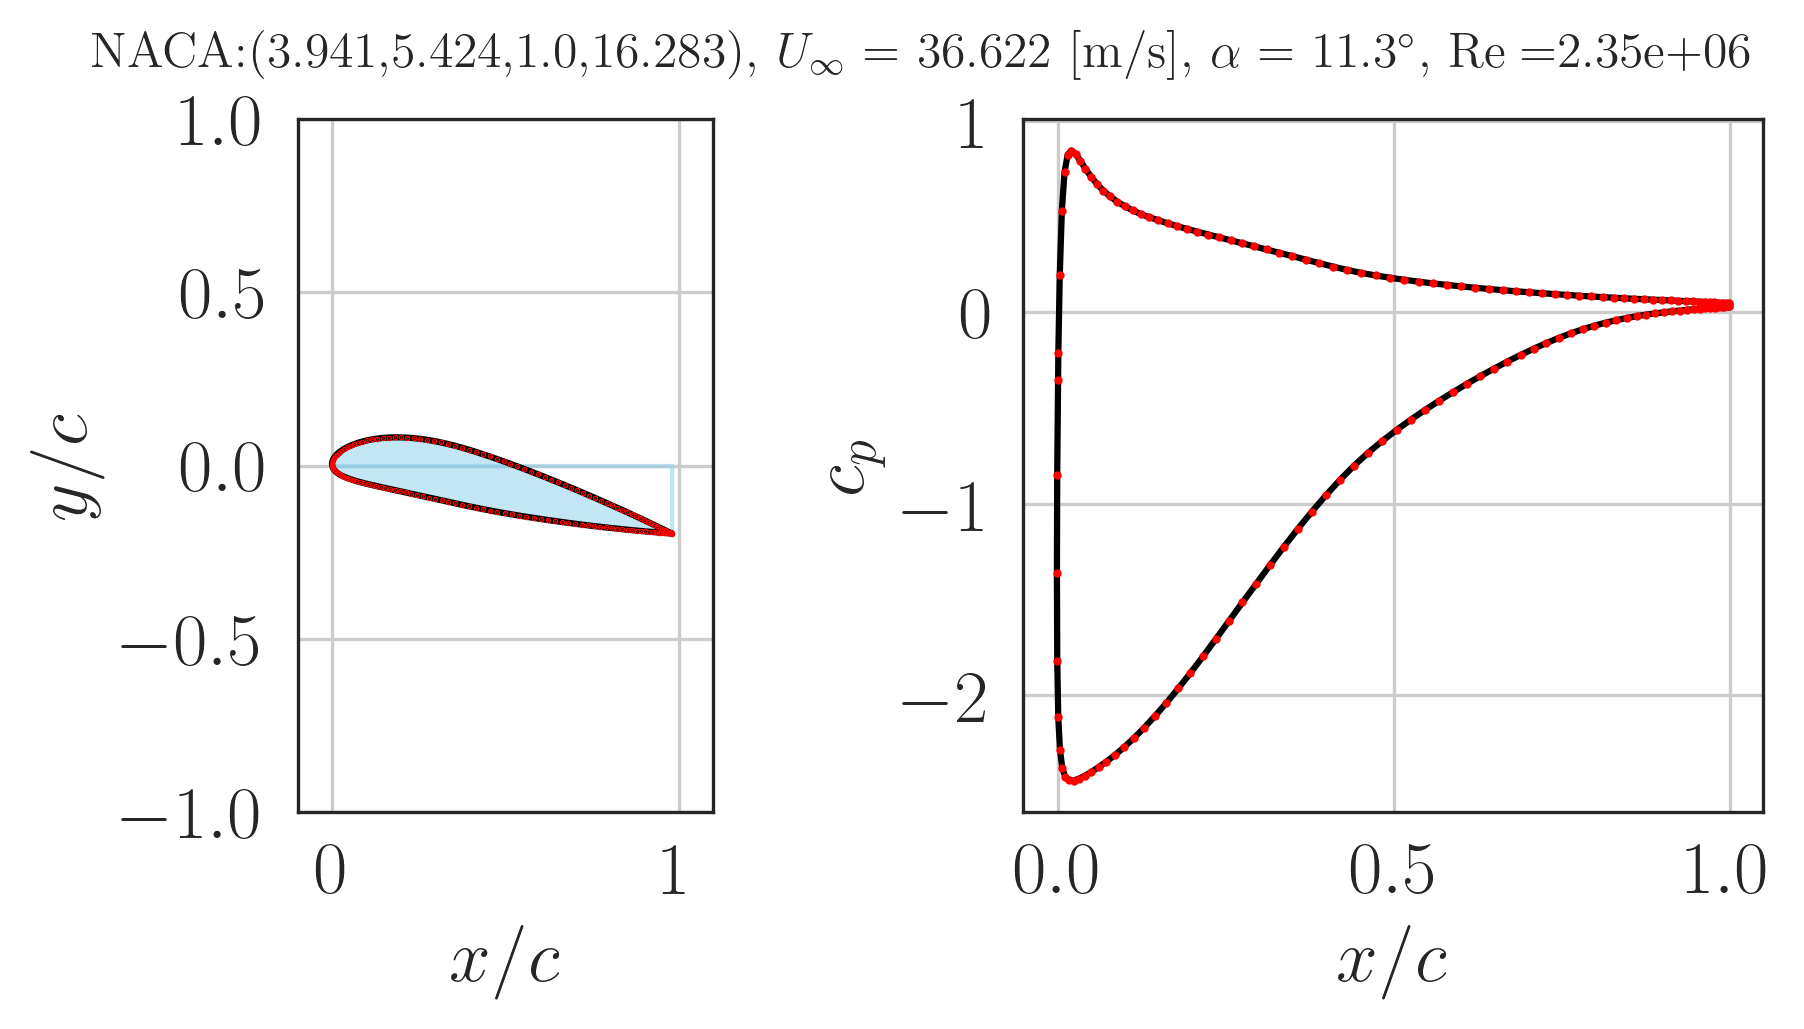

In [153]:
# Select a case
key_ = ('71.675', '1.743', '0.955_4.968_15.595')
key_ = ('36.622', '11.319', '3.941_5.424_1.0_16.283')
U_infty = float(key_[0])
angle_of_attack = float(key_[1])
naca_params = key_[2]
naca_params = key_[2].replace('_', ',')

# Airfoil graph with GBF description
# value_ is a Data object, this is the airfoil graph
value_ = dataset_GBF[key_]
print(value_)
# Graph input is Data.x 
input_graph = value_.x
output_graph = value_.y

# Airfoil coordinates and Reynolds number
x_coord = input_graph[:,0]
y_coord = input_graph[:,1]
Re_ = input_graph[:,2][0]

# While plotting pressure distribution, un-rotate the airfoil
rotated_airfoil = np.array([x_coord, y_coord]).T
un_rotated_airfoil = rotate_airfoil_coordinates(rotated_airfoil, -angle_of_attack)

# Pressure distribution
cp = output_graph[:,0]

# Plot the airfoil and the pressure distribution
fig, axs = plt.subplots(ncols=2, figsize=(7, 3))

plt.suptitle(f"NACA:({naca_params}), " + r"$U_{\infty}$ = " + f"{U_infty} [m/s], " + r"$\alpha$ = " + f"{angle_of_attack:.1f}" + r"$^\circ$, " + r"$\mathrm{Re}=$" + f"{Re_:.2e}")

axs[0].plot(rotated_airfoil[:,0], rotated_airfoil[:,1], color='black')
axs[0].scatter(rotated_airfoil[:,0], rotated_airfoil[:,1], color='red', zorder=2, s=0.1)
axs[0].fill_between(rotated_airfoil[:,0], rotated_airfoil[:,1], color='skyblue', alpha=0.5)
axs[0].set_xlabel(r'$x/c$')
axs[0].set_ylabel(r'$y/c$')
axs[0].set_xlim(-0.1,1.1)
axs[0].set_ylim(-1,1)
axs[0].grid('both')
axs[0].set_aspect('equal')

# Pressure distribution
axs[1].plot(un_rotated_airfoil[:,0], cp, color='black')
axs[1].scatter(un_rotated_airfoil[:,0], cp, color='red', zorder=2, s=1)
axs[1].set_xlabel(r'$x/c$')
axs[1].set_ylabel(r'$c_p$')
# axs[1].set_xlim(-0.5,1.5)
# axs[1].set_ylim(-1,1)
axs[1].grid('both')
# plt.tight_layout()
plt.savefig(root_path+'images/example_input_output.png', dpi=300, bbox_inches='tight')

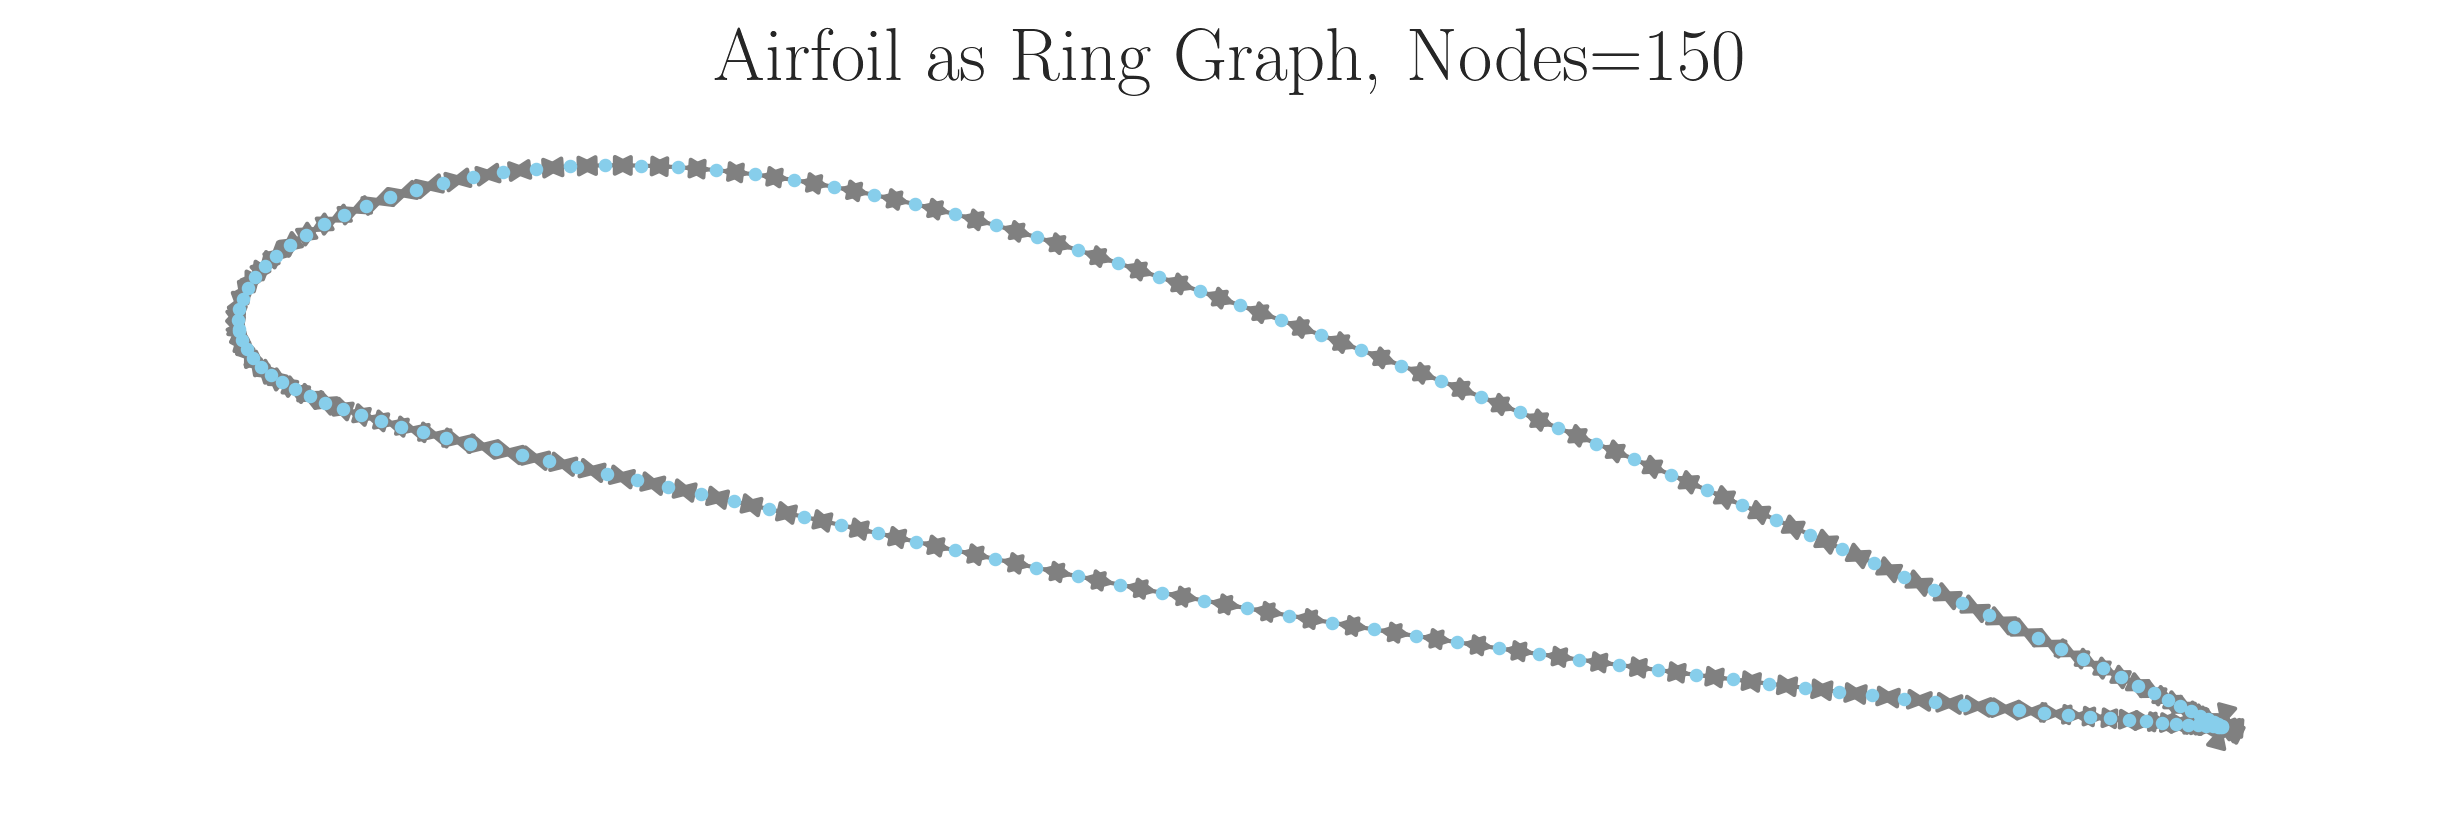

In [154]:
# Show the airfoil as a graph
plot_pygraph(value_)